In [152]:
import pandas as pd
pd.options.display.max_columns = 100
data = pd.read_csv('carsharing_features.csv',index_col = 0)

In [153]:
data.shape

(6850, 42)

In [116]:
data=data.drop(['최근탑승후경과일수'], axis=1)

In [117]:
data.head(3)

,아이디,등급,성별,연령,주소,차종count,대여존count,총요금합계,총요금평균,총요금최대,가입후경과일수,최초탑승후경과일수,예약일시count,종료,취소,취소비율,예약시간_총합,예약시간_최대,예약시간_평균,이용시간_총합,이용시간_최대,이용시간_평균,예약대기시간_총합,예약대기시간_최대,예약대기시간_평균,이용거리_총합,이용거리_최대,이용거리_평균,누적이용금액,취소패널티합계,반납지연요금합계,연장요금합계,반납지연률,연장빈도률,쿠폰사용률,주말사용율,사용주기,주사용시간대,타도시방문비율,출퇴근시간대사용비율,휴면여부
0,jjy2837,GRDA05,남,48,서울,1,2,2131600.0,47369.0,158180.0,1527,723,63,45,18,0.285714,624.833333,48.0,13.885185,583.450000,39.933333,12.965556,3237.500000,668.016667,71.944444,5013.0,398.0,111.400000,3213730.0,0.0,0.0,54560.0,0.0,0.111111,0.288889,0.67,7.0,10.0,0.0,0.377778,0
1,cholong119,GRDA02,여,28,서울,1,1,238550.0,59638.0,83080.0,960,759,5,4,1,0.200000,53.500000,21.0,13.375000,50.000000,20.583333,12.500000,21.033333,8.750000,5.258333,493.0,233.0,123.250000,1699735.0,0.0,0.0,18480.0,0.0,0.250000,0.250000,0.50,15.0,22.0,0.0,0.500000,0
2,youmi0217,GRDA06,여,28,인천,3,3,3119020.0,28615.0,181560.0,1413,713,116,109,7,0.060345,621.666667,54.0,5.703364,583.716667,54.083333,5.355199,139.916667,36.750000,1.283639,8629.0,511.0,79.165138,4419890.0,5000.0,0.0,287640.0,0.0,0.321101,0.201835,0.35,3.0,22.0,0.0,0.155963,0


In [118]:
#레이블 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data.주소)
data['주소'] = encoder.transform(data.주소)
encoder_1 = LabelEncoder()
encoder_1.fit(data.등급)
data['등급'] = encoder_1.transform(data.등급)

In [119]:
data['성별'] = data['성별'].apply(lambda x : 1 if x =='남자'  else 0)

In [120]:
data.head(3)

,아이디,등급,성별,연령,주소,차종count,대여존count,총요금합계,총요금평균,총요금최대,가입후경과일수,최초탑승후경과일수,예약일시count,종료,취소,취소비율,예약시간_총합,예약시간_최대,예약시간_평균,이용시간_총합,이용시간_최대,이용시간_평균,예약대기시간_총합,예약대기시간_최대,예약대기시간_평균,이용거리_총합,이용거리_최대,이용거리_평균,누적이용금액,취소패널티합계,반납지연요금합계,연장요금합계,반납지연률,연장빈도률,쿠폰사용률,주말사용율,사용주기,주사용시간대,타도시방문비율,출퇴근시간대사용비율,휴면여부
0,jjy2837,4,0,48,19,1,2,2131600.0,47369.0,158180.0,1527,723,63,45,18,0.285714,624.833333,48.0,13.885185,583.450000,39.933333,12.965556,3237.500000,668.016667,71.944444,5013.0,398.0,111.400000,3213730.0,0.0,0.0,54560.0,0.0,0.111111,0.288889,0.67,7.0,10.0,0.0,0.377778,0
1,cholong119,1,0,28,19,1,1,238550.0,59638.0,83080.0,960,759,5,4,1,0.200000,53.500000,21.0,13.375000,50.000000,20.583333,12.500000,21.033333,8.750000,5.258333,493.0,233.0,123.250000,1699735.0,0.0,0.0,18480.0,0.0,0.250000,0.250000,0.50,15.0,22.0,0.0,0.500000,0
2,youmi0217,5,0,28,34,3,3,3119020.0,28615.0,181560.0,1413,713,116,109,7,0.060345,621.666667,54.0,5.703364,583.716667,54.083333,5.355199,139.916667,36.750000,1.283639,8629.0,511.0,79.165138,4419890.0,5000.0,0.0,287640.0,0.0,0.321101,0.201835,0.35,3.0,22.0,0.0,0.155963,0


In [121]:
data_id=data.iloc[:,0].reset_index()

In [122]:
X_features = data.iloc[:, 1:-1] 
y_label = data.iloc[:, -1]

In [123]:
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    X_features, y_label, test_size = 0.2, random_state = 2021, stratify=y_label)

In [124]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

5480
5480
1370
1370


In [125]:
#불균형 처리
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 3, 4], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(train_features, train_target)

In [149]:
len(X_resampled)

10716

In [151]:
y_resampled.value_counts()

0    5358
1    5358
Name: 휴면여부, dtype: int64

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2021))

In [127]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(X_resampled, y_resampled)

print(gs.best_score_)
print(gs.best_params_)

0.9811511420488592
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 10}


In [128]:
# 최적의 모델 선택

best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(X_resampled, y_resampled)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                        random_state=2021))])

In [129]:
best_tree_for_graph = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, random_state = 2021)

In [130]:
best_tree_for_graph.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=2021)

In [131]:
y_pred = best_tree.predict(test_features)

In [132]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1340
           1       0.45      0.97      0.62        30

    accuracy                           0.97      1370
   macro avg       0.73      0.97      0.80      1370
weighted avg       0.99      0.97      0.98      1370



In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

정확도 accuracy: 0.974
정밀도 precision: 0.453
재현율 recall: 0.967
F1-score: 0.617
AUC: 0.970


In [135]:
from sklearn.metrics import roc_curve
fper, tper, thresholds = roc_curve(test_target, y_pred)


In [139]:
tper

array([0.        , 0.96666667, 1.        ])

In [136]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

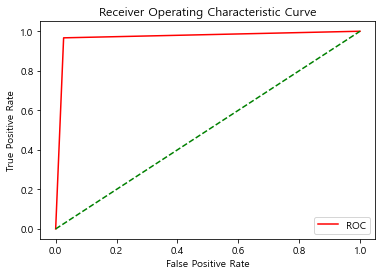

In [137]:
plot_roc_curve(fper, tper)

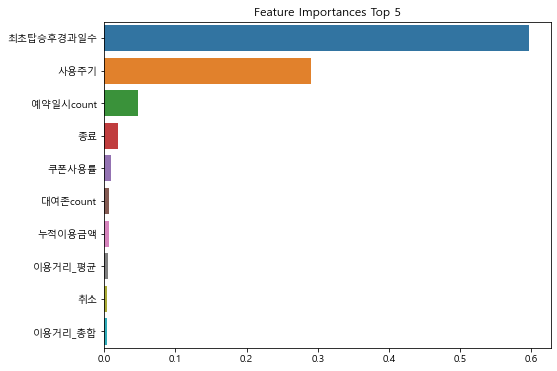

In [134]:
# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
import os
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_resampled.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [22]:
df = pd.read_csv('carsharing_features.csv',index_col = 0)

In [147]:
df['휴면여부'].value_counts()


0    6698
1     152
Name: 휴면여부, dtype: int64

([<matplotlib.patches.Wedge at 0x2281dc26dc0>,
 [Text(-1.0973282662988362, 0.07662033660582927, '0'),
  Text(1.0973282627119783, -0.07662038797547231, '1')],
 [Text(-0.598542690708456, 0.04179291087590687, '97.8'),
  Text(0.598542688751988, -0.041792938895712166, '2.2')])

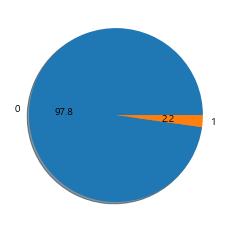

In [146]:
plt.pie(value, labels = labels, shadow = True, autopct = '%.1f')

In [89]:
dff = df.groupby('휴면여부')[['최초탑승후경과일수','사용주기','예약일시count','총요금평균','예약대기시간_평균','연장요금합계','이용시간_평균','쿠폰사용률']].mean()

In [90]:
dff

,최초탑승후경과일수,사용주기,예약일시count,총요금평균,예약대기시간_평균,연장요금합계,이용시간_평균,쿠폰사용률
휴면여부,,,,,,,,
0,303.600328,14.293819,11.978202,23278.585697,14.744604,16912.947148,4.514142,0.263337
1,444.625000,0.631579,1.835526,33333.052632,21.170246,3382.105263,5.501850,0.042763


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

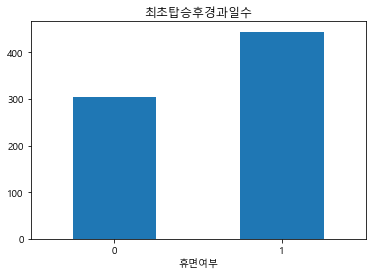

In [107]:
dff['최초탑승후경과일수'].plot.bar()
plt.title('최초탑승후경과일수')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

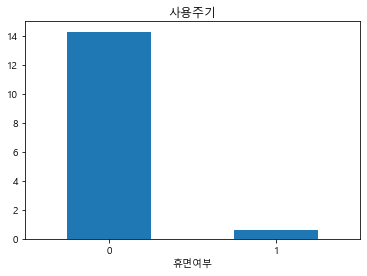

In [108]:
dff['사용주기'].plot.bar()
plt.title('사용주기')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

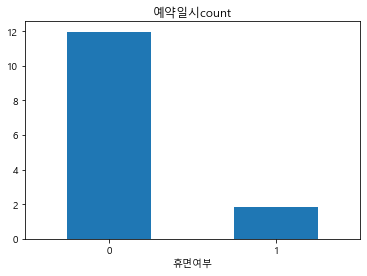

In [109]:
dff['예약일시count'].plot.bar()
plt.title('예약일시count')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

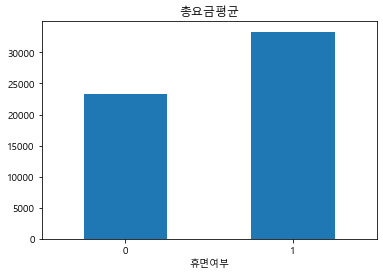

In [110]:
dff['총요금평균'].plot.bar()
plt.title('총요금평균')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

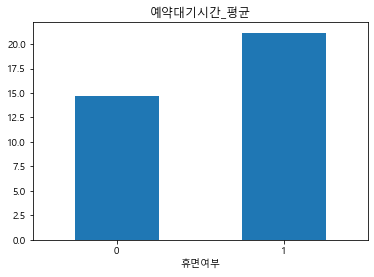

In [111]:
dff['예약대기시간_평균'].plot.bar()
plt.title('예약대기시간_평균')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

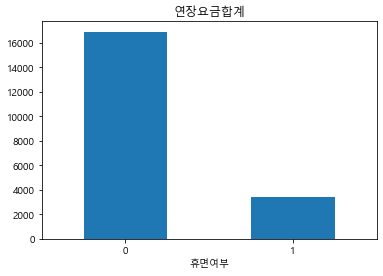

In [112]:
dff['연장요금합계'].plot.bar()
plt.title('연장요금합계')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

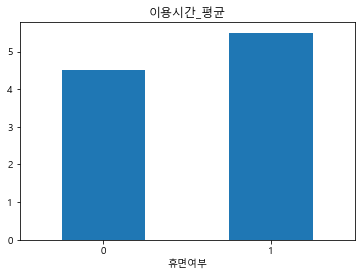

In [113]:
dff['이용시간_평균'].plot.bar()
plt.title('이용시간_평균')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

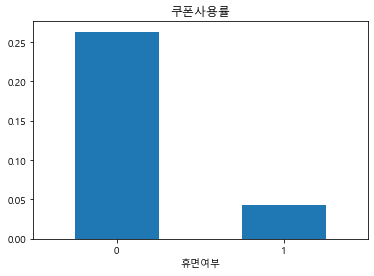

In [114]:
dff['쿠폰사용률'].plot.bar()
plt.title('쿠폰사용률')
plt.xticks(rotation=0)

In [25]:
df_휴면 = df.query('휴면여부 == 1')

In [27]:
df_휴면[df_휴면['사용주기']==1]

,아이디,등급,성별,연령,주소,차종count,대여존count,총요금합계,총요금평균,총요금최대,가입후경과일수,최초탑승후경과일수,최근탑승후경과일수,예약일시count,종료,취소,취소비율,예약시간_총합,예약시간_최대,예약시간_평균,이용시간_총합,이용시간_최대,이용시간_평균,예약대기시간_총합,예약대기시간_최대,예약대기시간_평균,이용거리_총합,이용거리_최대,이용거리_평균,누적이용금액,취소패널티합계,반납지연요금합계,연장요금합계,반납지연률,연장빈도률,쿠폰사용률,주말사용율,사용주기,주사용시간대,타도시방문비율,출퇴근시간대사용비율,휴면여부
37,sinattack,GRDA02,남,39,화성,1,1,155190.0,31038.0,88100.0,615,597,387,5,5,0,0.000000,22.333333,10.333333,4.466667,22.533333,10.383333,4.506667,1.050000,0.450000,0.210000,316.0,253.0,63.200000,2177660.0,0.0,0.0,35200.0,0.0,1.0,0.0,0.80,1.0,10.0,0.0,0.4,1
155,mtssamba,GRDA02,남,31,서울,2,1,176710.0,17671.0,43640.0,427,423,378,10,10,0,0.000000,32.166667,4.666667,3.216667,30.700000,4.466667,3.070000,2.850000,1.300000,0.285000,275.0,152.0,27.500000,251730.0,0.0,0.0,5280.0,0.0,0.3,0.0,0.00,1.0,13.0,0.0,0.2,1
194,lig82,GRDA02,남,34,하남,1,1,171250.0,11417.0,38840.0,404,398,370,15,15,0,0.000000,39.166667,7.000000,2.611111,39.200000,7.000000,2.613333,1.550000,0.300000,0.103333,140.0,38.0,9.333333,223690.0,0.0,0.0,14960.0,0.0,0.2,0.0,0.07,1.0,4.0,0.0,0.2,1
530,4694,GRDA02,남,49,수원,1,1,2270.0,1135.0,2270.0,451,386,382,2,2,0,0.000000,1.500000,1.000000,0.750000,1.400000,1.000000,0.700000,0.100000,0.066667,0.050000,2.0,2.0,1.000000,2270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,9.0,0.0,1.0,1
537,josefina3,GRDA02,여,44,고양,1,2,146860.0,73430.0,108460.0,386,386,382,2,2,0,0.000000,19.666667,14.500000,9.833333,19.450000,14.216667,9.725000,4.300000,4.050000,2.150000,169.0,117.0,84.500000,146860.0,0.0,0.0,55020.0,0.0,1.0,0.0,0.00,1.0,10.0,0.0,0.5,1
619,kih523,GRDA02,여,35,남양주,1,1,203790.0,40758.0,50750.0,385,384,377,9,5,4,0.444444,56.500000,17.000000,11.300000,54.166667,17.133333,10.833333,66.516667,22.800000,13.303333,361.0,121.0,72.200000,203790.0,0.0,0.0,7920.0,0.0,0.2,0.0,0.00,1.0,6.0,0.0,0.6,1
667,wndduf0212,GRDA02,남,27,서울,1,1,48370.0,24185.0,29510.0,383,383,380,2,2,0,0.000000,7.666667,4.500000,3.833333,7.300000,4.200000,3.650000,0.266667,0.183333,0.133333,105.0,54.0,52.500000,48370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,1.0,15.0,0.0,0.5,1
1038,bhlee746,GRDA02,남,55,성남,1,1,44840.0,22420.0,36560.0,1544,742,367,2,2,0,0.000000,8.000000,6.000000,4.000000,7.716667,5.750000,3.858333,419.850000,403.750000,209.925000,66.0,58.0,33.000000,134320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,1.0,13.0,0.0,0.0,1
1121,bsh0129,GRDA02,여,40,화성,1,1,107390.0,53695.0,58460.0,1223,519,366,2,2,0,0.000000,10.000000,6.000000,5.000000,9.883333,5.966667,4.941667,4.966667,3.766667,2.483333,399.0,204.0,199.500000,343800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,1.0,13.0,0.0,0.5,1
1130,kgtto123,GRDA02,여,43,파주,1,2,248550.0,124275.0,168830.0,539,502,366,3,2,1,0.333333,73.000000,48.000000,36.500000,72.966667,47.900000,36.483333,73.083333,70.416667,36.541667,637.0,469.0,318.500000,432940.0,0.0,0.0,5280.0,0.0,0.5,0.0,0.50,1.0,15.0,0.0,0.0,1


In [52]:
df_휴면x = df.query('휴면여부 == 0')
df_고객 = df_휴면x.query('최초탑승후경과일수 > 444')

In [34]:
df_이탈예상 = df_고객.query('사용주기 == 0')

In [36]:
df.groupby('사용주기')['아이디'].count()

사용주기
0.0      2325
1.0       169
2.0       201
3.0       219
4.0       182
         ... 
151.0       1
154.0       1
177.0       1
179.0       1
184.0       1
Name: 아이디, Length: 137, dtype: int64

In [38]:
df_고객['누적이용금액'].mean()

631475.0240793201

In [40]:
df_휴면['누적이용금액'].mean()

111163.48684210527

In [42]:
print(df_고객['사용주기'].mean())
print(df_휴면['사용주기'].mean())

20.771246458923514
0.631578947368421


In [43]:
print(df_고객['예약일시count'].mean())
print(df_휴면['예약일시count'].mean())

22.672804532577903
1.8355263157894737


In [44]:
df

,아이디,등급,성별,연령,주소,차종count,대여존count,총요금합계,총요금평균,총요금최대,가입후경과일수,최초탑승후경과일수,최근탑승후경과일수,예약일시count,종료,취소,취소비율,예약시간_총합,예약시간_최대,예약시간_평균,이용시간_총합,이용시간_최대,이용시간_평균,예약대기시간_총합,예약대기시간_최대,예약대기시간_평균,이용거리_총합,이용거리_최대,이용거리_평균,누적이용금액,취소패널티합계,반납지연요금합계,연장요금합계,반납지연률,연장빈도률,쿠폰사용률,주말사용율,사용주기,주사용시간대,타도시방문비율,출퇴근시간대사용비율,휴면여부
0,jjy2837,GRDA05,남,48,서울,1,2,2131600.0,47369.0,158180.0,1527,723,17,63,45,18,0.285714,624.833333,48.000000,13.885185,583.450000,39.933333,12.965556,3237.500000,668.016667,71.944444,5013.0,398.0,111.400000,3213730.0,0.0,0.0,54560.0,0.000,0.111111,0.288889,0.67,7.0,10.0,0.0,0.377778,0
1,cholong119,GRDA02,여,28,서울,1,1,238550.0,59638.0,83080.0,960,759,296,5,4,1,0.200000,53.500000,21.000000,13.375000,50.000000,20.583333,12.500000,21.033333,8.750000,5.258333,493.0,233.0,123.250000,1699735.0,0.0,0.0,18480.0,0.000,0.250000,0.250000,0.50,15.0,22.0,0.0,0.500000,0
2,youmi0217,GRDA06,여,28,인천,3,3,3119020.0,28615.0,181560.0,1413,713,23,116,109,7,0.060345,621.666667,54.000000,5.703364,583.716667,54.083333,5.355199,139.916667,36.750000,1.283639,8629.0,511.0,79.165138,4419890.0,5000.0,0.0,287640.0,0.000,0.321101,0.201835,0.35,3.0,22.0,0.0,0.155963,0
3,yunseo1115,GRDA02,여,33,평택,1,1,242480.0,22044.0,48900.0,406,394,360,13,11,2,0.153846,34.166667,7.500000,3.106061,34.266667,7.400000,3.115152,18.916667,15.400000,1.719697,632.0,124.0,57.454545,242480.0,0.0,0.0,26400.0,0.000,0.181818,0.000000,0.45,3.0,1.0,0.0,0.181818,0
4,campos2,GRDA02,여,33,남양주,1,1,75080.0,9385.0,21700.0,482,475,337,8,8,0,0.000000,12.666667,3.333333,1.583333,12.616667,3.316667,1.577083,10.733333,6.816667,1.341667,72.0,18.0,9.000000,114310.0,0.0,14080.0,7040.0,0.125,0.250000,0.125000,0.50,7.0,13.0,0.0,0.375000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,creo33,GRDA02,여,48,인천,1,1,7390.0,7390.0,7390.0,58,22,22,1,1,0,0.000000,1.500000,1.500000,1.500000,1.600000,1.600000,1.600000,0.250000,0.250000,0.250000,5.0,5.0,5.000000,7390.0,0.0,0.0,2640.0,0.000,1.000000,0.000000,0.00,0.0,10.0,0.0,1.000000,0
6846,khw9218,GRDA02,여,25,고양,1,1,4180.0,4180.0,4180.0,197,22,22,1,1,0,0.000000,1.000000,1.000000,1.000000,1.250000,1.250000,1.250000,0.066667,0.066667,0.066667,4.0,4.0,4.000000,4180.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00,0.0,11.0,0.0,0.000000,0
6847,diddytlr,GRDA02,남,50,수원,1,1,22960.0,22960.0,22960.0,1571,22,22,1,1,0,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,19.000000,19.000000,19.000000,55.0,55.0,55.000000,22960.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.00,0.0,14.0,0.0,0.000000,0
6848,ljj8062,GRDA02,남,48,성남,1,1,8820.0,8820.0,8820.0,41,22,22,1,1,0,0.000000,1.333333,1.333333,1.333333,1.300000,1.300000,1.300000,1.066667,1.066667,1.066667,22.0,22.0,22.000000,8820.0,0.0,0.0,1760.0,0.000,1.000000,0.000000,0.00,0.0,16.0,0.0,0.000000,0


In [45]:
print(df_고객['취소비율'].mean())
print(df_휴면['취소비율'].mean())

0.1322824116554203
0.08006996658312449


In [53]:
print(df_고객['예약대기시간_평균'].mean())
print(df_휴면x['예약대기시간_평균'].mean())
print(df_휴면['예약대기시간_평균'].mean())

16.523138708109393
14.744603872574324
21.17024644946095


In [54]:
print(df_고객['연장요금합계'].mean())
print(df_휴면x['연장요금합계'].mean())
print(df_휴면['연장요금합계'].mean())

30565.906515580737
16912.94714840251
3382.1052631578946


In [55]:
print(df_고객['쿠폰사용률'].mean())
print(df_휴면x['쿠폰사용률'].mean())
print(df_휴면['쿠폰사용률'].mean())

0.17014401913178134
0.26333656403615613
0.04276315789473684


In [59]:
print(df_고객['타도시방문비율'].mean())
print(df_휴면x['타도시방문비율'].mean())
print(df_휴면['타도시방문비율'].mean())

0.035892572644193134
0.03964359975815942
0.049342105263157895


In [61]:
print(df_고객['출퇴근시간대사용비율'].mean())
print(df_휴면x['출퇴근시간대사용비율'].mean())
print(df_휴면['출퇴근시간대사용비율'].mean())

0.40089415853954524
0.39828169286854376
0.4194235588972431
